<a href="https://colab.research.google.com/github/jingxiangwu/games/blob/main/Two_person_stopping_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two-person Stopping game

Two players are playing a game where they each draw a secret random number uniformly between 0 and 1.

If they are not satisfied with their draw they may redraw.

The players do not know whether or not the other has chosen to re-draw. The players then compare their numbers and he/she who holds largest number wins.

What is the best strategy assuming both players are **perfectly rational**?

In [22]:
import random
import matplotlib.pyplot as plt

In [23]:
import random
def tournament(a, b, n=1000):
        return sum(redraw_below(a) > redraw_below(b) for _ in range(n)) / n

def redraw_below(c):
    x = random.random()
    if x < c:
        x = random.random()
    return x

In [24]:
# Note that 0.5 is not optimal.
# It has less chance to win compared to someone with cutoff 0.5
tournament(0.5, 0.6, n=10000000)

0.4951105

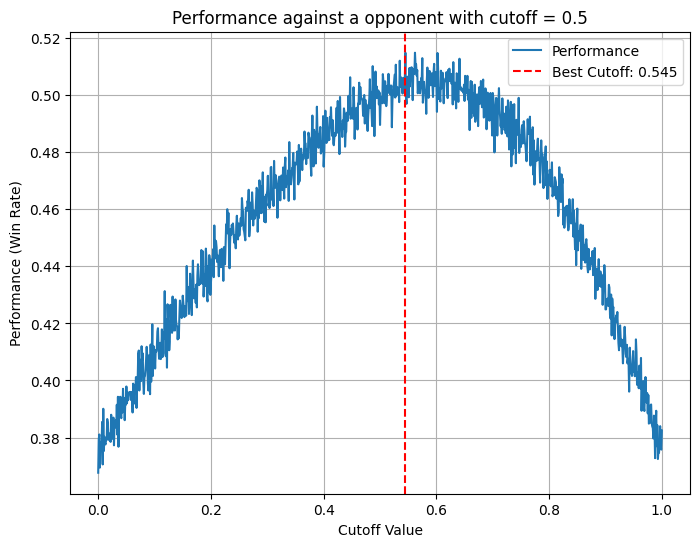

In [25]:
def find_best_cutoff(n_trials=10000, step_size=0.001):

    best_cutoff = 0
    best_performance = 0

    cutoffs = [i * step_size for i in range(int(1 / step_size) + 1)]

    performance_dict = {}

    for cutoff in cutoffs:
        performance = tournament(cutoff, 0.5, n_trials)
        performance_dict[cutoff] = performance
        if performance > best_performance:
            best_performance = performance
            best_cutoff = cutoff

    return best_cutoff, best_performance, performance_dict


best_cutoff, best_performance, performance_dict = find_best_cutoff()

cutoff_values = list(performance_dict.keys())
performance_values = list(performance_dict.values())

plt.figure(figsize=(8, 6))
plt.plot(cutoff_values, performance_values, label='Performance')
plt.xlabel('Cutoff Value')
plt.ylabel('Performance (Win Rate)')
plt.title('Performance against a opponent with cutoff = 0.5')
plt.grid(True)
plt.axvline(x=best_cutoff, color='red', linestyle='--', label=f'Best Cutoff: {best_cutoff:.3f}')
plt.legend()

plt.show()

In order to make the curve smoother, let's run a larger experiment.

First, let's vectorize the code

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def tournament_vectorized(a, b, n=1000):

    player_a_results = redraw_below_vectorized(a, n)
    player_b_results = redraw_below_vectorized(b, n)

    return np.mean(player_a_results > player_b_results)

def redraw_below_vectorized(c, n):

    x = np.random.random(n)
    redraws = np.random.random(n)
    x = np.where(x < c, redraws, x)
    return x

def find_best_cutoff_vectorized(n_trials=1000000, step_size=0.001):

    best_cutoff = 0
    best_performance = 0

    cutoffs = np.arange(0, 1 + step_size, step_size)

    performance_dict = {}

    for cutoff in cutoffs:
        performance = tournament_vectorized(cutoff, 0.5, n_trials)
        performance_dict[cutoff] = performance
        if performance > best_performance:
            best_performance = performance
            best_cutoff = cutoff

    return best_cutoff, best_performance, performance_dict

best_cutoff_vec, best_performance_vec, performance_dict_vec = find_best_cutoff_vectorized()
cutoff_values_vec = list(performance_dict_vec.keys())
performance_values_vec = list(performance_dict_vec.values())

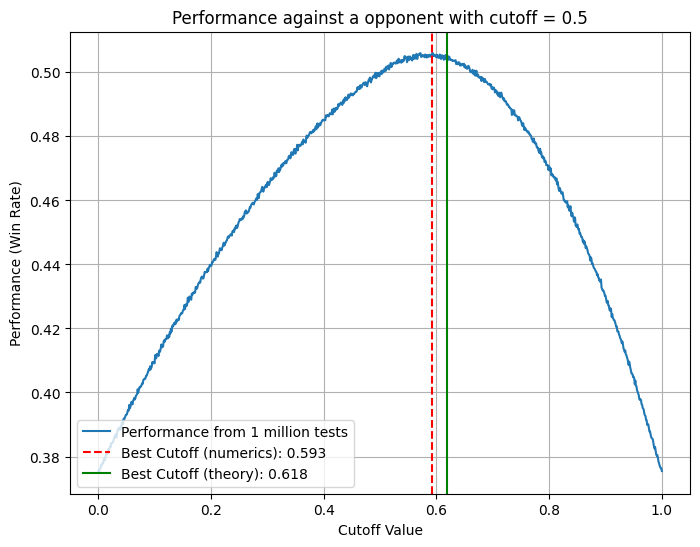

In [27]:
# Plot performance against the cutoff values
plt.figure(figsize=(8, 6))
plt.plot(cutoff_values_vec, performance_values_vec, label='Performance from 1 million tests')
plt.xlabel('Cutoff Value')
plt.ylabel('Performance (Win Rate)')
plt.title('Performance against a opponent with cutoff = 0.5')
plt.grid(True)
plt.axvline(x=best_cutoff_vec, color='red', linestyle='--', label=f'Best Cutoff (numerics): {best_cutoff_vec:.3f}')
theory_cutoff = (np.sqrt(5)-1)/2
plt.axvline(x=theory_cutoff, color='green', linestyle='-', label=f'Best Cutoff (theory): {theory_cutoff:.3f}')
plt.legend(loc='lower left')

plt.show()